In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
data = pd.read_csv("./fraud_order_classifier.csv")

In [3]:
data.dropna(inplace=True)

In [17]:
from typing import List, Tuple


def plot(data, X, Y, topk=None, mode="count", plot_type="bar", figsize=(10, 4)):
    """
    Count/Mean of Y for every X
    Create a bar plot and pie chart based on the plot_type argument.
    """
    group = data.groupby(X)[Y]
    group = (
        group.mean()
        if mode == "mean"
        else group.nunique()
        if mode == "unique count"
        else group.count()
    )

    group = (
        group.nlargest(topk).reset_index() if topk is not None else group.reset_index()
    )

    x_axis = group[X]
    x_axis = ["\n".join(str(x).split(" ")) for x in x_axis]
    y_axis = group[Y]

    plt.figure(figsize=figsize)

    if plot_type == "pie":
        plt.pie(y_axis, labels=x_axis, autopct="%1.1f%%", startangle=140)

    else:
        sns.barplot(x=x_axis, y=y_axis)

    plt.xticks(fontsize=10, rotation=90)
    plt.grid(color="black", linestyle="-", linewidth=1, alpha=0.3)
    plt.title(f"{Y} distribution for {X}")

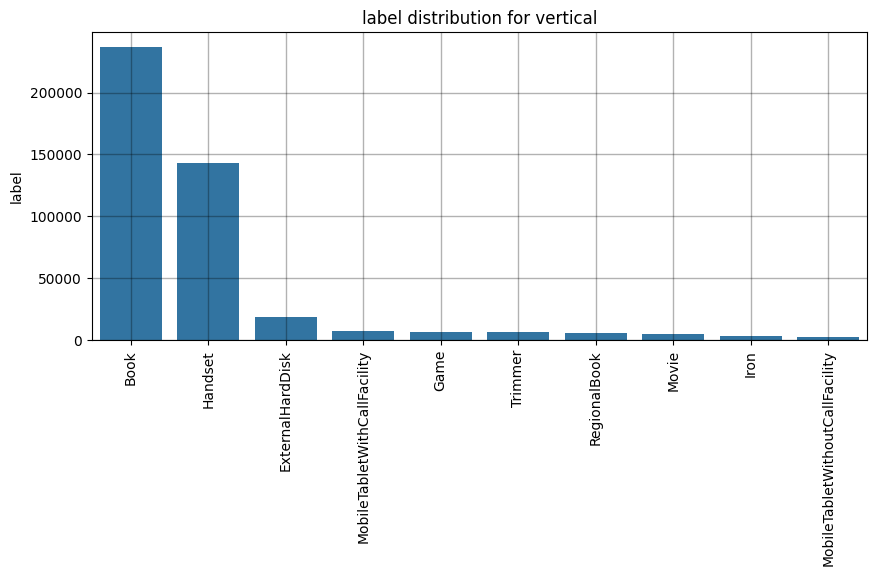

In [25]:
plot(data, "vertical", "label", topk=10, plot_type="bar", figsize=(10, 4))

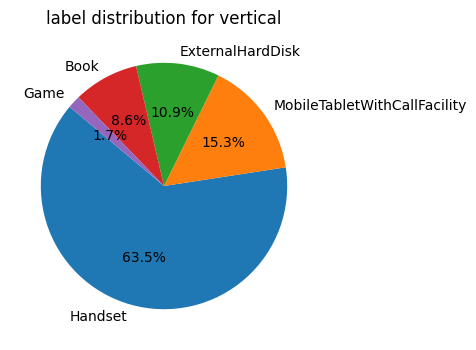

In [22]:
plot(data[data["label"] == "fraud"], "vertical", "label", topk=5, plot_type="pie", figsize=(10, 4))

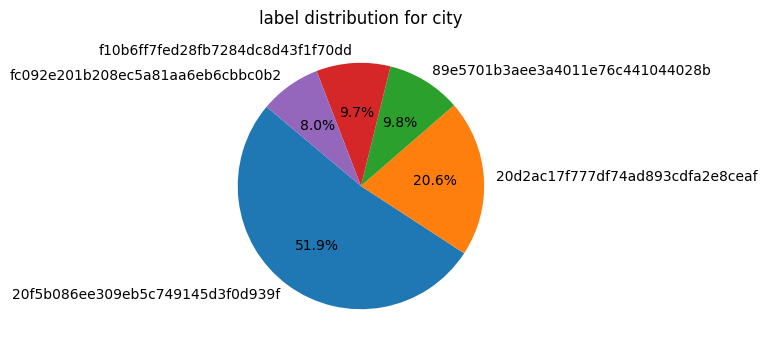

In [26]:
plot(data[data["label"] == "fraud"], "city", "label", topk=5, plot_type="pie")

In [34]:
column = "selling_price"
bins = 10

data[f"{column}_bucket"] = pd.cut(data[column], bins, labels=[str(i) for i in range(bins)])

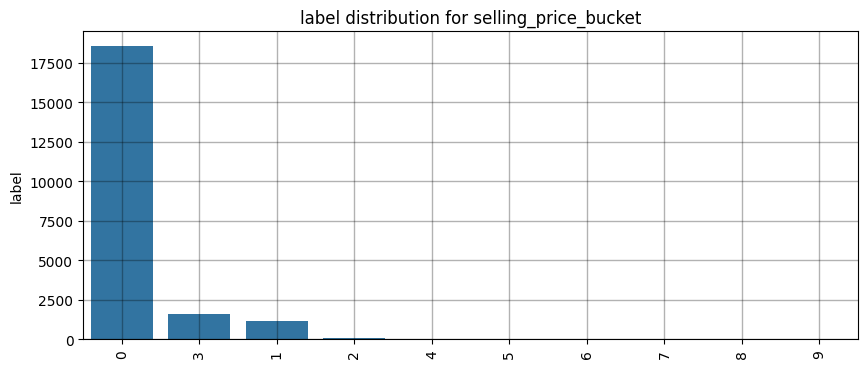

In [35]:
plot(data[data["label"] == "fraud"], f"{column}_bucket", "label", topk=10, plot_type="bar", figsize=(10, 4))